35
                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-03-07 19:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-08 19:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 19:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 19:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 20:00:00         NaN     NaN         NaN          NaN    NaN   

                        Forecast  
Date                              
2018-03-07 19:00:00  1199.457765  
2018-03-08 19:00:00  1204.742969  
2018-03-09 19:00:00  1203.585493  
2018-03-10 19:00:00  1139.045345  
2018-03-11 20:00:00  1086.936772  


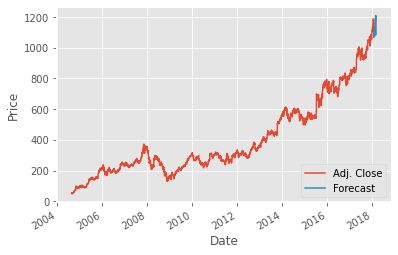

In [16]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

#df = dataframe
df = quandl.get('WIKI/GOOGL', api_key = 'PqycpwV1sCzh1VFcYs8L')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)


forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out) 

#features capital X, labels lowercase y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#train model

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

#print(accuracy)

forecast_set = clf.predict(X_lately)
#print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
print(df.tail())

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()